In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import shapiro, levene, ttest_ind

In [2]:
control = pd.read_excel('/kaggle/input/ab-testing-data/ab_testing.xlsx', sheet_name = "Control Group")
test = pd.read_excel('/kaggle/input/ab-testing-data/ab_testing.xlsx', sheet_name = "Test Group")

In [3]:
control.head()

,Impression,Click,Purchase,Earning
0,82529.459271,6090.077317,665.211255,2311.277143
1,98050.451926,3382.861786,315.084895,1742.806855
2,82696.023549,4167.965750,458.083738,1797.827447
3,109914.400398,4910.882240,487.090773,1696.229178
4,108457.762630,5987.655811,441.034050,1543.720179


In [4]:
control.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,40.0,101711.449068,20302.157862,45475.942965,85726.690349,99790.701078,115212.816543,147539.336329
Click,40.0,5100.657373,1329.985498,2189.753157,4124.304129,5001.220602,5923.803596,7959.125069
Purchase,40.0,550.894059,134.108201,267.028943,470.095533,531.206307,637.957088,801.795020
Earning,40.0,1908.568300,302.917783,1253.989525,1685.847205,1975.160522,2119.802784,2497.295218


In [5]:
test.head()

,Impression,Click,Purchase,Earning
0,120103.503796,3216.547958,702.160346,1939.611243
1,134775.943363,3635.082422,834.054286,2929.405820
2,107806.620788,3057.143560,422.934258,2526.244877
3,116445.275526,4650.473911,429.033535,2281.428574
4,145082.516838,5201.387724,749.860442,2781.697521


In [6]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,40.0,120512.411758,18807.448712,79033.834921,112691.970770,119291.300775,132050.578933,158605.920483
Click,40.0,3967.549761,923.095073,1836.629861,3376.819024,3931.359804,4660.497911,6019.695079
Purchase,40.0,582.106097,161.152513,311.629515,444.626828,551.355732,699.862360,889.910460
Earning,40.0,2514.890733,282.730852,1939.611243,2280.537426,2544.666107,2761.545405,3171.489708


In [7]:
def quick_info(dataframe):
    print("--------- HEAD ---------")
    print(dataframe.head(10))
    print("--------- SHAPE ---------")
    print(dataframe.shape)
    print("--------- COLUMNS ---------")
    print(dataframe.columns)
    print("--------- DESCRIBE ---------")
    print(dataframe.describe().T)
    print("--------- INFO ---------")
    print(dataframe.info())
    print("--------- FREQUENCY ---------")
    print(dataframe.nunique())
    print("--------- ANY NULL VALUES ---------")
    print(dataframe.isnull().values.any())
    print("--------- SUM OF NULL VALUES ---------")
    print(dataframe.isnull().sum())

quick_info(control)
print(28*'-/')
quick_info(test)

--------- HEAD ---------
      Impression        Click    Purchase      Earning
0   82529.459271  6090.077317  665.211255  2311.277143
1   98050.451926  3382.861786  315.084895  1742.806855
2   82696.023549  4167.965750  458.083738  1797.827447
3  109914.400398  4910.882240  487.090773  1696.229178
4  108457.762630  5987.655811  441.034050  1543.720179
5   77773.633900  4462.206586  519.669656  2081.851850
6   95110.586266  3555.580670  512.928746  1815.006614
7  106649.183075  4358.027043  747.020123  1965.100400
8  122709.716594  5091.558964  745.985682  1651.662991
9   79498.248658  6653.845515  470.501367  2456.304240
--------- SHAPE ---------
(40, 4)
--------- COLUMNS ---------
Index(['Impression', 'Click', 'Purchase', 'Earning'], dtype='object')
--------- DESCRIBE ---------
            count           mean           std           min           25%  \
Impression   40.0  101711.449068  20302.157862  45475.942965  85726.690349   
Click        40.0    5100.657373   1329.985498   2189

<AxesSubplot:>

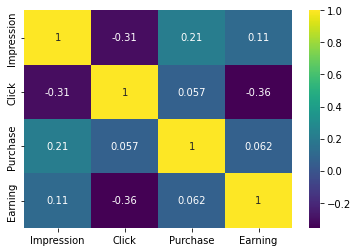

In [8]:
sns.heatmap(control.corr(), annot = True, cmap = "viridis")

<AxesSubplot:>

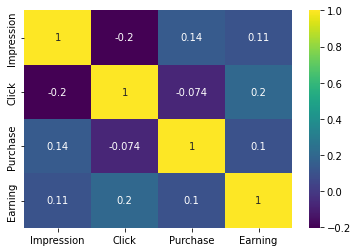

In [9]:
sns.heatmap(test.corr(), annot = True, cmap = "viridis")

In [10]:
control['class'] = 'Control'
test['class'] = 'Test'

In [11]:
df = pd.concat([control, test])

In [12]:
quick_info(df)

--------- HEAD ---------
      Impression        Click    Purchase      Earning    class
0   82529.459271  6090.077317  665.211255  2311.277143  Control
1   98050.451926  3382.861786  315.084895  1742.806855  Control
2   82696.023549  4167.965750  458.083738  1797.827447  Control
3  109914.400398  4910.882240  487.090773  1696.229178  Control
4  108457.762630  5987.655811  441.034050  1543.720179  Control
5   77773.633900  4462.206586  519.669656  2081.851850  Control
6   95110.586266  3555.580670  512.928746  1815.006614  Control
7  106649.183075  4358.027043  747.020123  1965.100400  Control
8  122709.716594  5091.558964  745.985682  1651.662991  Control
9   79498.248658  6653.845515  470.501367  2456.304240  Control
--------- SHAPE ---------
(80, 5)
--------- COLUMNS ---------
Index(['Impression', 'Click', 'Purchase', 'Earning', 'class'], dtype='object')
--------- DESCRIBE ---------
            count           mean           std           min           25%  \
Impression   80.0  1111

##### Defining the A/B Test Hypothesis
---
1) Define the hypothesis.


 H0 : M1 = M2 -> There is **NO** statistically significant difference between the mean gains of the control and test groups.

 H1 : M1 != M2 -> There **is a** statistically significant difference between the mean gains of the control and test groups.

---

2) Analyze the purchase averages for the control and test group

In [13]:
df.groupby("class").agg({"Purchase":"mean"})

,Purchase
class,
Control,550.894059
Test,582.106097


There is a difference in the average earnings of the two groups on a mathematical basis. Therefore we can ask these two questions;

Is there really a significant difference? Or did this difference come about by chance?

##### **Performing Hypothesis Testing**
##### AB Testing (Independent Two-Sample T-Test)

---

1) Before testing the hypothesis, check the assumptions. These are Assumption of Normality and Homogeneity of Variance. Test separately whether the control and test groups comply with the assumption of normality over the Purchase variable.

Normality Assumption:
> H0: Normal distribution assumption is provided.

> H1: Normal distribution assumption is not provided.

> p < 0.05 H0 REJECT, p > 0.05 H0 CANNOT REJECT

> Is the assumption of normality according to the test result provided for the control and test groups? Interpret the p-values obtained.

Variance Homogeneity:

> H0: Variances are homogeneous.

> H1: Variances are not homogeneous.

> p < 0.05 H0 REJECT , p > 0.05 H0 CANNOT REJECT

Test whether the homogeneity of variance is provided for the control and test groups over the Purchase variable.

Is the assumption of normality provided according to the test result? Interpret the p-values obtained.

In [14]:
test_stat, pvalue = shapiro(df.loc[df["class"]=="Control", "Purchase"])
print('Test Stat = %.3f, p-value = %.3f' % (test_stat, pvalue))

Test Stat = 0.977, p-value = 0.589


In [15]:
test_stat, pvalue = shapiro(df.loc[df["class"]=="Test", "Purchase"])
print('Test Stat = %.3f, p-value = %.3f' % (test_stat, pvalue))

Test Stat = 0.959, p-value = 0.154


In [16]:
test_stat, pvalue = levene(df.loc[df["class"]=="Control", "Purchase"], df.loc[df["class"]=="Test", "Purchase"])
print('Test Stat = %.3f, p-value = %.3f' % (test_stat, pvalue))

Test Stat = 2.639, p-value = 0.108


> H0 cannot be rejected as p-value > 0.05 in both groups. The assumption of normality is provided.

> H0 cannot be rejected because p-value > 0.05. The mean earnings variances of the two groups are homogeneous.

2) Select the appropriate test according to the Normality Assumption and Variance Homogeneity results.

In [17]:
# The t-test is applied as the assumptions are satisfied. (parametric test)

test_stat, pvalue = ttest_ind(df.loc[df["class"]=="Control", "Purchase"], df.loc[df["class"]=="Test", "Purchase"])
print('Test Stat = %.3f, p-value = %.3f' % (test_stat, pvalue))

Test Stat = -0.942, p-value = 0.349


3) Considering the p_value obtained as a result of the test, interpret whether there is a statistically significant difference between the purchasing averages of the control and test groups.

     H0 cannot be rejected because the p-value is greater than 0.05. Therefore, there is no statistically significant difference between the purchasing averages of the control and test groups. The difference arose by chance.

##### Analysis of Results
1) Which test was used, specify the reasons.

> The t-test was applied as the assumptions were satisfied.

2) Advise the customer according to the test results you have obtained.

> As a result of the analysis, it was found that the Purchase average value, which was created by taking the Maximum Bidding in the control group and the Average Bidding in the test group, did not make a statistically significant difference. Both offer types are available.